In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.reset_option("display.max_rows")
data=pd.read_csv('dataset_case_study.csv')
data

,Timestamp,Urea density in kg/m3,Absorber water inlet flow in kg/h,ECS unit inlet temperature in °C,Evaporator MeOH feed flow in kg/h,Cooling water mass flow in kg/h,Heat transfer fluid inlet temperature in °C,Formaldehyde product flow in kg/h,Reactor temperature at position 10 in °C,Reactor temperature at position 1 in °C,Reactor temperature at position 2 in °C,Reactor temperature at position 3 in °C,Reactor temperature at position 4 in °C,Reactor temperature at position 5 in °C,Reactor temperature at position 6 in °C,Reactor temperature at position 7 in °C,Reactor temperature at position 8 in °C,Reactor temperature at position 9 in °C,Fresh air flow in m3/h,Recycle gas flow in m3/h
0,2015-08-29 18:00:00+03:00,1001.933333,545.072675,298.840733,974.551667,247.665340,275.825133,1900.551508,286.246400,283.129917,-11.905150,294.694483,304.522917,311.394017,321.997317,2323.234883,324.863550,317.086067,1238.023500,11142.2115
1,2015-08-29 19:00:00+03:00,1001.937833,524.850608,298.903833,974.686883,234.911420,275.805150,1834.871442,286.245350,283.099633,-11.950600,294.642850,304.446950,311.308633,321.997400,2323.313267,324.821683,316.734183,1236.903833,11132.1345
2,2015-08-29 20:00:00+03:00,1001.950000,524.329050,298.591217,972.685933,231.466414,275.785900,1890.488775,286.307717,283.156450,-11.865317,294.697067,304.511083,311.370050,321.992583,2323.254183,324.833083,316.774867,1238.909667,11150.1870
3,2015-08-29 21:00:00+03:00,1001.938667,524.996792,298.294783,973.674917,219.214371,275.787467,1843.392833,286.273500,283.090267,-11.939233,294.625400,304.471983,311.343850,321.930650,2323.175433,324.774050,316.683300,1236.954333,11132.5890
4,2015-08-29 22:00:00+03:00,1001.934500,524.068533,298.445333,973.878383,227.772577,275.776067,1861.938167,286.225933,283.013467,-12.027050,294.558600,304.387250,311.291533,321.957550,2323.239600,324.735733,316.610450,1238.842333,11149.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2015-12-02 12:00:00+02:00,986.721167,828.666125,274.917817,1661.077950,393.560200,280.511583,3125.126142,284.191817,290.805417,-1.634300,310.508100,322.547567,332.709867,341.346167,2339.056633,334.105467,318.212667,1549.072833,13941.6555
2276,2015-12-02 13:00:00+02:00,986.839050,826.804183,273.750250,1660.300950,399.180150,280.497767,3116.168067,284.065217,290.798817,-1.599683,310.623483,322.738983,332.834817,341.298983,2338.614033,333.454450,317.576517,1554.216000,13987.9440
2277,2015-12-02 14:00:00+02:00,986.916317,828.558208,274.671583,1661.848883,398.532683,280.498367,3091.177250,284.094600,290.893717,-1.415483,310.838167,322.973567,332.955833,341.251500,2338.366650,333.150333,317.377500,1560.850333,14047.6530
2278,2015-12-02 15:00:00+02:00,986.761050,830.636392,271.960867,1662.269583,395.196783,280.502250,3122.368783,284.168950,291.052867,-1.171100,311.159150,323.305317,333.170083,341.327467,2338.201333,332.839000,317.146833,1563.412000,14070.7080


In [3]:
#changing the order of data columns
data.columns
data=data[['Timestamp', 'Urea density in kg/m3',
       'Absorber water inlet flow in kg/h', 'ECS unit inlet temperature in °C',
       'Evaporator MeOH feed flow in kg/h', 'Cooling water mass flow in kg/h',
       'Heat transfer fluid inlet temperature in °C',
       'Fresh air flow in m3/h','Recycle gas flow in m3/h',
       'Reactor temperature at position 10 in °C',
       'Reactor temperature at position 1 in °C',
       'Reactor temperature at position 2 in °C',
       'Reactor temperature at position 3 in °C',
       'Reactor temperature at position 4 in °C',
       'Reactor temperature at position 5 in °C',
       'Reactor temperature at position 6 in °C',
       'Reactor temperature at position 7 in °C',
       'Reactor temperature at position 8 in °C',
       'Reactor temperature at position 9 in °C', 
       'Formaldehyde product flow in kg/h']]

data

,Timestamp,Urea density in kg/m3,Absorber water inlet flow in kg/h,ECS unit inlet temperature in °C,Evaporator MeOH feed flow in kg/h,Cooling water mass flow in kg/h,Heat transfer fluid inlet temperature in °C,Fresh air flow in m3/h,Recycle gas flow in m3/h,Reactor temperature at position 10 in °C,Reactor temperature at position 1 in °C,Reactor temperature at position 2 in °C,Reactor temperature at position 3 in °C,Reactor temperature at position 4 in °C,Reactor temperature at position 5 in °C,Reactor temperature at position 6 in °C,Reactor temperature at position 7 in °C,Reactor temperature at position 8 in °C,Reactor temperature at position 9 in °C,Formaldehyde product flow in kg/h
0,2015-08-29 18:00:00+03:00,1001.933333,545.072675,298.840733,974.551667,247.665340,275.825133,1238.023500,11142.2115,286.246400,283.129917,-11.905150,294.694483,304.522917,311.394017,321.997317,2323.234883,324.863550,317.086067,1900.551508
1,2015-08-29 19:00:00+03:00,1001.937833,524.850608,298.903833,974.686883,234.911420,275.805150,1236.903833,11132.1345,286.245350,283.099633,-11.950600,294.642850,304.446950,311.308633,321.997400,2323.313267,324.821683,316.734183,1834.871442
2,2015-08-29 20:00:00+03:00,1001.950000,524.329050,298.591217,972.685933,231.466414,275.785900,1238.909667,11150.1870,286.307717,283.156450,-11.865317,294.697067,304.511083,311.370050,321.992583,2323.254183,324.833083,316.774867,1890.488775
3,2015-08-29 21:00:00+03:00,1001.938667,524.996792,298.294783,973.674917,219.214371,275.787467,1236.954333,11132.5890,286.273500,283.090267,-11.939233,294.625400,304.471983,311.343850,321.930650,2323.175433,324.774050,316.683300,1843.392833
4,2015-08-29 22:00:00+03:00,1001.934500,524.068533,298.445333,973.878383,227.772577,275.776067,1238.842333,11149.5810,286.225933,283.013467,-12.027050,294.558600,304.387250,311.291533,321.957550,2323.239600,324.735733,316.610450,1861.938167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2015-12-02 12:00:00+02:00,986.721167,828.666125,274.917817,1661.077950,393.560200,280.511583,1549.072833,13941.6555,284.191817,290.805417,-1.634300,310.508100,322.547567,332.709867,341.346167,2339.056633,334.105467,318.212667,3125.126142
2276,2015-12-02 13:00:00+02:00,986.839050,826.804183,273.750250,1660.300950,399.180150,280.497767,1554.216000,13987.9440,284.065217,290.798817,-1.599683,310.623483,322.738983,332.834817,341.298983,2338.614033,333.454450,317.576517,3116.168067
2277,2015-12-02 14:00:00+02:00,986.916317,828.558208,274.671583,1661.848883,398.532683,280.498367,1560.850333,14047.6530,284.094600,290.893717,-1.415483,310.838167,322.973567,332.955833,341.251500,2338.366650,333.150333,317.377500,3091.177250
2278,2015-12-02 15:00:00+02:00,986.761050,830.636392,271.960867,1662.269583,395.196783,280.502250,1563.412000,14070.7080,284.168950,291.052867,-1.171100,311.159150,323.305317,333.170083,341.327467,2338.201333,332.839000,317.146833,3122.368783


In [4]:
data.describe()

,Urea density in kg/m3,Absorber water inlet flow in kg/h,ECS unit inlet temperature in °C,Evaporator MeOH feed flow in kg/h,Cooling water mass flow in kg/h,Heat transfer fluid inlet temperature in °C,Fresh air flow in m3/h,Recycle gas flow in m3/h,Reactor temperature at position 10 in °C,Reactor temperature at position 1 in °C,Reactor temperature at position 2 in °C,Reactor temperature at position 3 in °C,Reactor temperature at position 4 in °C,Reactor temperature at position 5 in °C,Reactor temperature at position 6 in °C,Reactor temperature at position 7 in °C,Reactor temperature at position 8 in °C,Reactor temperature at position 9 in °C,Formaldehyde product flow in kg/h
count,2280.000000,2271.000000,2280.000000,2280.000000,2280.000000,2280.000000,2265.000000,2265.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2232.000000,2280.000000,2280.000000,2280.000000,2280.000000
mean,990.488075,723.710186,301.657819,1366.050017,355.167567,278.666305,1478.430125,13305.871122,285.274191,286.704219,-6.055517,303.854884,315.336155,323.300880,333.793979,2331.142826,327.071815,313.953877,2597.662713
std,12.812363,124.858658,25.652389,261.926321,89.146770,2.137672,149.483730,1345.353570,1.802903,3.166794,4.254640,5.838082,7.058467,8.457518,8.417169,8.932190,8.128240,5.849784,497.722572
min,712.235050,115.004949,72.130570,5.385294,0.048762,267.537083,0.420046,3.780419,270.148733,257.118167,-42.957567,263.021817,265.038533,266.613467,271.429967,2268.750717,269.369217,269.856517,0.000000
25%,989.673567,682.706529,295.980117,1400.422887,329.705942,276.755504,1469.216167,13222.945500,284.444183,284.896517,-8.271250,301.424175,313.603425,320.641171,333.504392,2329.747442,324.856613,312.322954,2597.623321
50%,990.909333,768.505325,303.481900,1431.143875,340.494242,279.219242,1518.784833,13669.063500,285.339608,286.775308,-5.448508,305.054633,317.200267,324.813017,335.680850,2331.886642,326.856392,313.805175,2713.630996
75%,992.562546,789.512558,316.372746,1432.713975,393.316750,280.361646,1546.861833,13921.756500,286.273063,288.311100,-3.166829,307.724017,319.579487,328.294454,337.763242,2333.644496,329.826067,316.626925,2758.610181
max,1002.215500,986.582042,335.546433,1665.255667,621.187400,296.626233,1617.560000,14558.040000,304.201783,298.113900,7.958283,315.240283,323.743700,333.342033,343.248917,2345.580767,343.788833,335.793067,4627.693525


In [5]:
data.isnull().sum()

Timestamp                                       0
Urea density in kg/m3                           0
Absorber water inlet flow in kg/h               9
ECS unit inlet temperature in °C                0
Evaporator MeOH feed flow in kg/h               0
Cooling water mass flow in kg/h                 0
Heat transfer fluid inlet temperature in °C     0
Fresh air flow in m3/h                         15
Recycle gas flow in m3/h                       15
Reactor temperature at position 10 in °C        0
Reactor temperature at position 1 in °C         0
Reactor temperature at position 2 in °C         0
Reactor temperature at position 3 in °C         0
Reactor temperature at position 4 in °C         0
Reactor temperature at position 5 in °C         0
Reactor temperature at position 6 in °C        48
Reactor temperature at position 7 in °C         0
Reactor temperature at position 8 in °C         0
Reactor temperature at position 9 in °C         0
Formaldehyde product flow in kg/h               0


In [6]:
data=data.ffill(axis=0)

<AxesSubplot:>

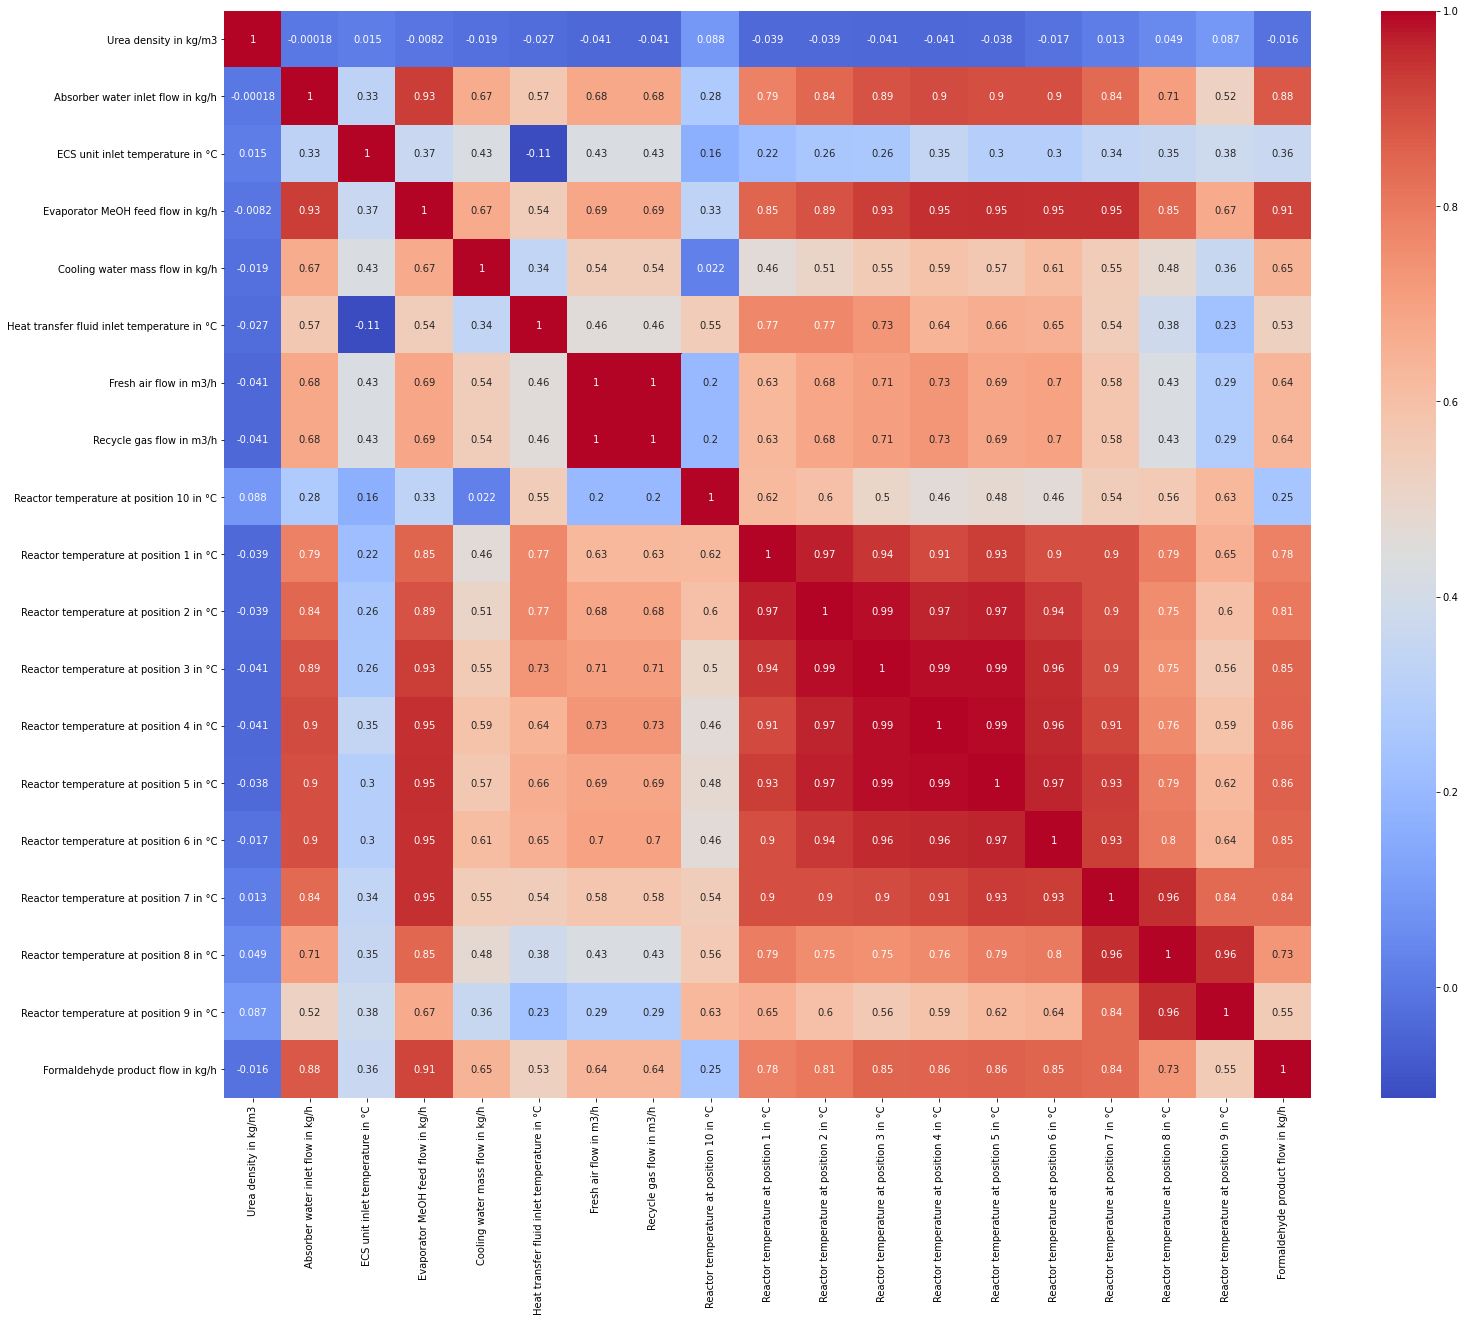

In [7]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(),square=True,annot=True,cmap='coolwarm')


In [8]:
'''
fig, axes = plt.subplots(10, 1, figsize=(15, 30), sharex=True)
for name, ax in zip(['Reactor temperature at position 1 in °C',
       'Reactor temperature at position 2 in °C',
       'Reactor temperature at position 3 in °C',
       'Reactor temperature at position 4 in °C',
       'Reactor temperature at position 5 in °C',
       'Reactor temperature at position 6 in °C',
       'Reactor temperature at position 7 in °C',
       'Reactor temperature at position 8 in °C',
       'Reactor temperature at position 9 in °C','Reactor temperature at position 10 in °C'], axes):
    ax.plot(data[name])
    
    ax.set_title(name)
    mean  = data[name].mean()
    std = data[name].std(ddof=1)
    
    LCL =mean-2*std
    UCL =mean+2*std
    ax.axhline(mean,c='k')
    ax.axhline(LCL,ls='--',c='r')
    ax.axhline(UCL,ls='--',c='r')
'''

"\nfig, axes = plt.subplots(10, 1, figsize=(15, 30), sharex=True)\nfor name, ax in zip(['Reactor temperature at position 1 in °C',\n       'Reactor temperature at position 2 in °C',\n       'Reactor temperature at position 3 in °C',\n       'Reactor temperature at position 4 in °C',\n       'Reactor temperature at position 5 in °C',\n       'Reactor temperature at position 6 in °C',\n       'Reactor temperature at position 7 in °C',\n       'Reactor temperature at position 8 in °C',\n       'Reactor temperature at position 9 in °C','Reactor temperature at position 10 in °C'], axes):\n    ax.plot(data[name])\n    \n    ax.set_title(name)\n    mean  = data[name].mean()\n    std = data[name].std(ddof=1)\n    \n    LCL =mean-2*std\n    UCL =mean+2*std\n    ax.axhline(mean,c='k')\n    ax.axhline(LCL,ls='--',c='r')\n    ax.axhline(UCL,ls='--',c='r')\n"

<AxesSubplot:>

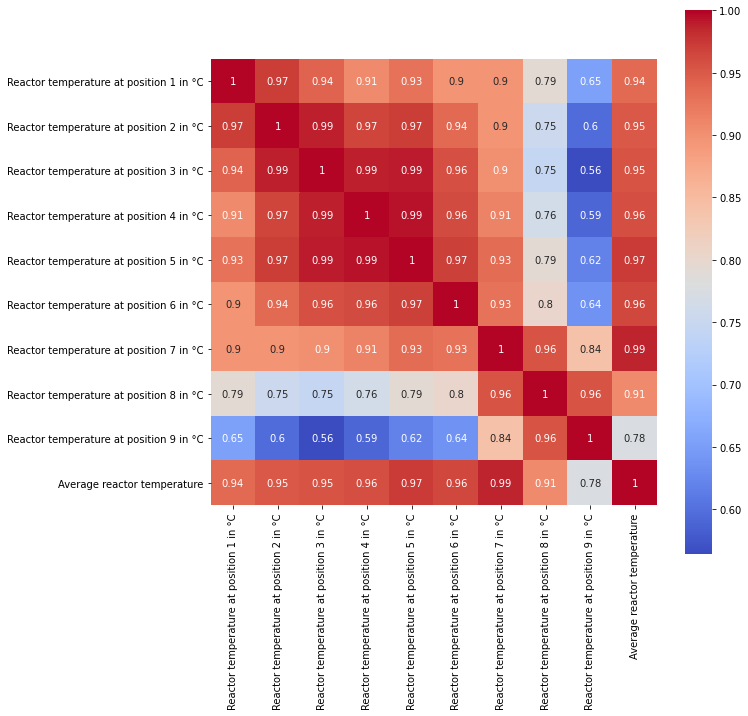

In [9]:
df=data.copy()
df['Average reactor temperature']=df[[
       'Reactor temperature at position 1 in °C',
       'Reactor temperature at position 2 in °C',
       'Reactor temperature at position 3 in °C',
       'Reactor temperature at position 4 in °C',
       'Reactor temperature at position 5 in °C',
       'Reactor temperature at position 6 in °C',
       'Reactor temperature at position 7 in °C',
       'Reactor temperature at position 8 in °C',
       'Reactor temperature at position 9 in °C']].mean(axis=1)

plt.figure(figsize=(10, 10))
sns.heatmap(df[['Reactor temperature at position 1 in °C',
       'Reactor temperature at position 2 in °C',
       'Reactor temperature at position 3 in °C',
       'Reactor temperature at position 4 in °C',
       'Reactor temperature at position 5 in °C',
       'Reactor temperature at position 6 in °C',
       'Reactor temperature at position 7 in °C',
       'Reactor temperature at position 8 in °C',
       'Reactor temperature at position 9 in °C','Average reactor temperature']].corr(),square=True,annot=True,cmap='coolwarm')


In [10]:
df=df.drop(['Reactor temperature at position 10 in °C',
       'Reactor temperature at position 1 in °C',
       'Reactor temperature at position 2 in °C',
       'Reactor temperature at position 3 in °C',
       'Reactor temperature at position 4 in °C',
       'Reactor temperature at position 5 in °C',
       'Reactor temperature at position 6 in °C',
       'Reactor temperature at position 7 in °C',
       'Reactor temperature at position 8 in °C',
       'Reactor temperature at position 9 in °C'], axis=1)



In [11]:
corr=df.iloc[:,1:].corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.iloc[:,1:].columns[columns]
df_new= df[selected_columns]


In [12]:
df_new['Evaporator MeOH feed flow in kg/h']=df['Evaporator MeOH feed flow in kg/h']
df_new['Average reactor temperature']=df['Average reactor temperature']
df_new['Formaldehyde product flow in kg/h']=df['Formaldehyde product flow in kg/h']

df_new.drop(['Urea density in kg/m3','ECS unit inlet temperature in °C','Absorber water inlet flow in kg/h',],axis=1, inplace=True)
df_new

<ipython-input-12-740054e8fcf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Evaporator MeOH feed flow in kg/h']=df['Evaporator MeOH feed flow in kg/h']
<ipython-input-12-740054e8fcf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Average reactor temperature']=df['Average reactor temperature']
<ipython-input-12-740054e8fcf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Cooling water mass flow in kg/h,Heat transfer fluid inlet temperature in °C,Fresh air flow in m3/h,Evaporator MeOH feed flow in kg/h,Average reactor temperature,Formaldehyde product flow in kg/h
0,247.665340,275.825133,1238.023500,974.551667,496.557556,1900.551508
1,234.911420,275.805150,1236.903833,974.686883,496.490444,1834.871442
2,231.466414,275.785900,1238.909667,972.685933,496.524894,1890.488775
3,219.214371,275.787467,1236.954333,973.674917,496.461744,1843.392833
4,227.772577,275.776067,1238.842333,973.878383,496.418570,1861.938167
...,...,...,...,...,...,...
2275,393.560200,280.511583,1549.072833,1661.077950,509.739731,3125.126142
2276,399.180150,280.497767,1554.216000,1660.300950,509.593378,3116.168067
2277,398.532683,280.498367,1560.850333,1661.848883,509.599087,3091.177250
2278,395.196783,280.502250,1563.412000,1662.269583,509.670106,3122.368783


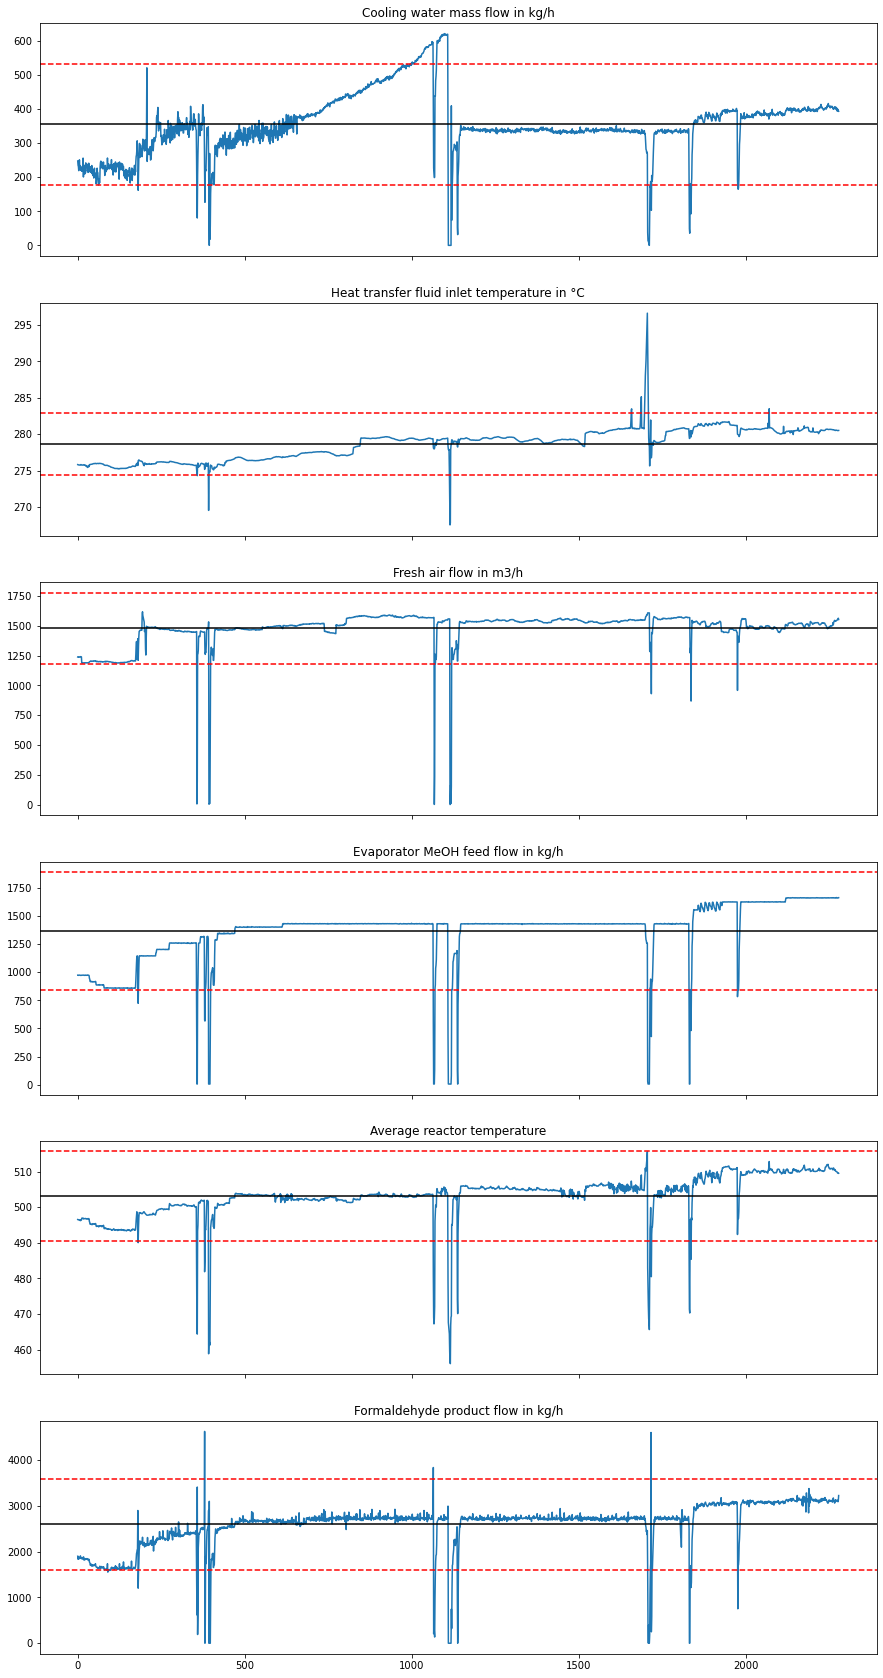

In [883]:
fig, axes = plt.subplots(6, 1, figsize=(15, 30), sharex=True)
for name, ax in zip(df_new.columns, axes):
    ax.plot(df_new[name])
    
    ax.set_title(name)
    mean  = df_new[name].mean()
    std = df_new[name].std()
    
    LCL =mean-2*std
    UCL =mean+2*std
    ax.axhline(mean,c='k')
    ax.axhline(LCL,ls='--',c='r')
    ax.axhline(UCL,ls='--',c='r')
    
    

In [884]:
mean  = df_new['Formaldehyde product flow in kg/h'].mean()
std = df_new['Formaldehyde product flow in kg/h'].std()
    
LCL= mean-2*std  
UCL =mean+2*std
df_new[df_new['Formaldehyde product flow in kg/h']>UCL]

,Cooling water mass flow in kg/h,Heat transfer fluid inlet temperature in °C,Fresh air flow in m3/h,Evaporator MeOH feed flow in kg/h,Average reactor temperature,Formaldehyde product flow in kg/h
380,205.837564,275.167850,1447.963793,574.996149,481.895363,4627.693525
1065,413.928083,278.216483,1569.806000,551.886191,481.103328,3838.897284
1717,133.733586,277.657217,1288.687522,465.338040,480.558787,4604.338375


In [885]:
df_new[df_new['Formaldehyde product flow in kg/h']<LCL].head(60)

,Cooling water mass flow in kg/h,Heat transfer fluid inlet temperature in °C,Fresh air flow in m3/h,Evaporator MeOH feed flow in kg/h,Average reactor temperature,Formaldehyde product flow in kg/h
80,225.554810,275.758517,1199.608000,861.215017,494.057180,1600.283592
86,221.990713,275.717450,1199.627667,859.978000,493.988713,1595.546517
90,229.238519,275.691117,1200.092667,861.187367,493.977298,1552.992700
91,230.053031,275.676900,1199.870500,860.548733,493.787085,1578.875492
92,239.576751,275.637183,1199.252000,861.155983,493.907065,1576.806525
93,235.607127,275.627133,1199.923500,860.477800,493.820743,1599.766175
96,228.319553,275.590667,1197.725333,860.255900,493.848672,1594.384925
97,226.164450,275.549283,1198.209667,861.197517,493.873807,1593.681308
99,228.346678,275.484333,1196.463333,859.943350,493.777267,1598.844683
126,234.944027,275.302350,1189.458333,859.386383,493.685743,1601.607117


<AxesSubplot:>

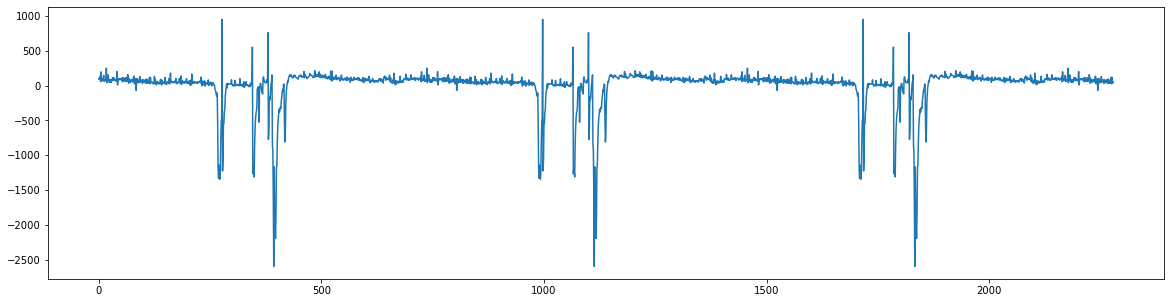

In [886]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = df['Formaldehyde product flow in kg/h']

decompose = seasonal_decompose(analysis,period=720)

plt.figure(figsize=(20,5))
decompose.seasonal.plot()

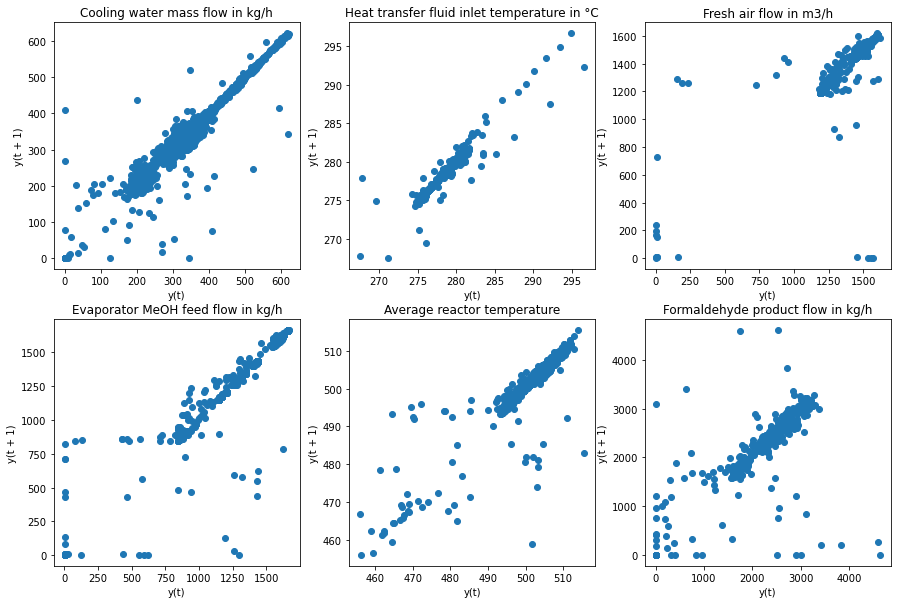

In [887]:
from pandas.plotting import lag_plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for name , ax in zip(df_new.columns, axes.flatten()):
    lag_plot(df_new[name],ax=ax, lag=1)
    ax.set_title(name)

<AxesSubplot:>

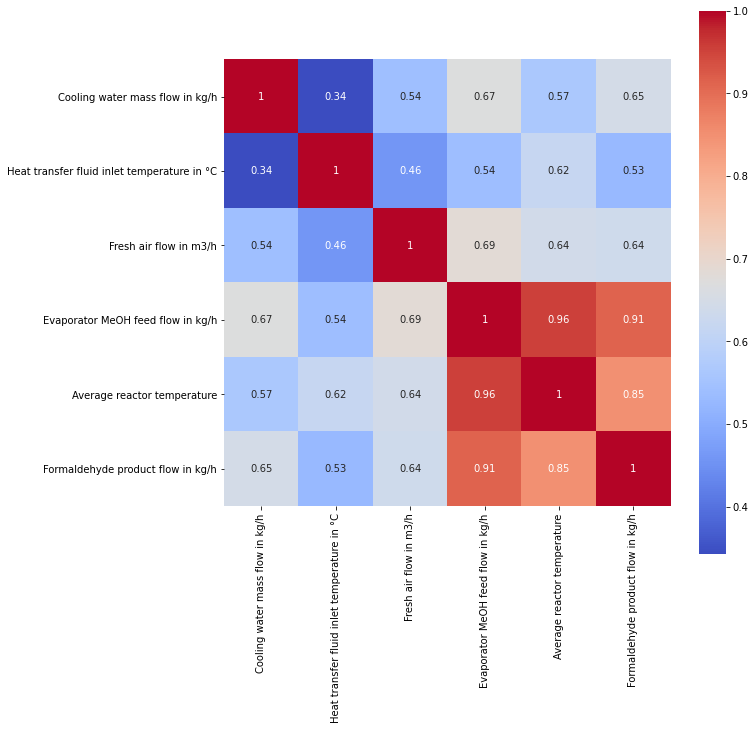

In [888]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_new.corr(),square=True,annot=True,cmap='coolwarm')

In [889]:
#KPIs=ratio of formaldehyde production over MeOH feed, monthly
#extracting month

df['date']=df['Timestamp'].apply(lambda x:x.split(' ')[0])
df['time']=df['Timestamp'].apply(lambda x:int(x.split(' ')[1].split('+')[0].split(':')[0]))
df['month']=df['date'].apply(lambda x:pd.to_datetime(x).month)
df['week']=df['date'].apply(lambda x:pd.to_datetime(x).week)
df['day']=df['date'].apply(lambda x:pd.to_datetime(x).day)
pro_feed=df.groupby('month')[['Formaldehyde product flow in kg/h','Evaporator MeOH feed flow in kg/h']].sum()
pro_feed['ratio']=pro_feed['Formaldehyde product flow in kg/h']/pro_feed['Evaporator MeOH feed flow in kg/h']

pro_feed

,Formaldehyde product flow in kg/h,Evaporator MeOH feed flow in kg/h,ratio
month,,,
8,9.730683e+04,5.155061e+04,1.887598
9,1.683485e+06,8.850713e+05,1.902090
10,1.968607e+06,1.031732e+06,1.908061
11,2.045628e+06,1.078082e+06,1.897469
12,1.276439e+05,6.815794e+04,1.872766


<AxesSubplot:xlabel='day', ylabel='Formaldehyde product flow in kg/h'>

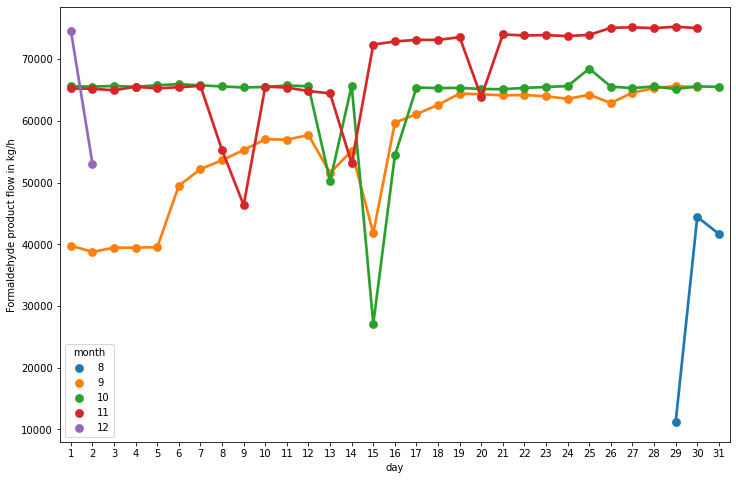

In [890]:
df_pro=pd.DataFrame(df.groupby(['month','day'])['Formaldehyde product flow in kg/h'].sum()).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x='day', y='Formaldehyde product flow in kg/h',hue='month', data=df_pro)

<AxesSubplot:xlabel='day', ylabel='Evaporator MeOH feed flow in kg/h'>

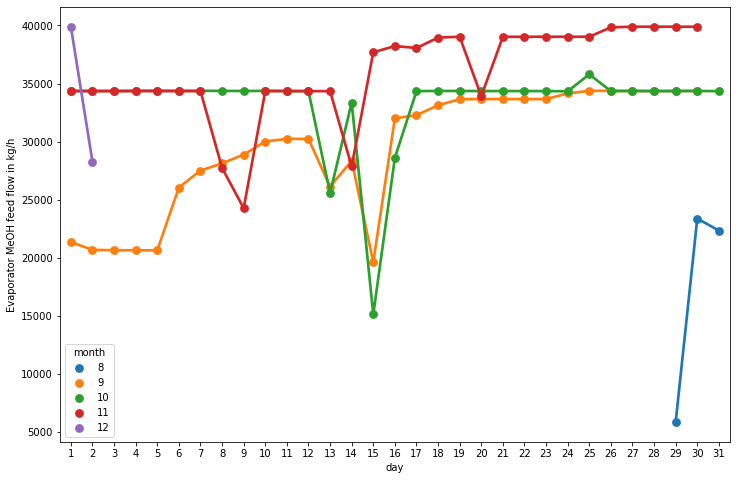

In [891]:
df_feed=pd.DataFrame(df.groupby(['month','day'])['Evaporator MeOH feed flow in kg/h'].sum()).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x='day', y='Evaporator MeOH feed flow in kg/h',hue='month', data=df_feed)

,month,day,pro/feed
0,8,29,1.916245
1,8,30,1.900598
2,8,31,1.866496
3,9,1,1.863449
4,9,2,1.874878
...,...,...,...
91,11,28,1.880040
92,11,29,1.886119
93,11,30,1.880164
94,12,1,1.870159


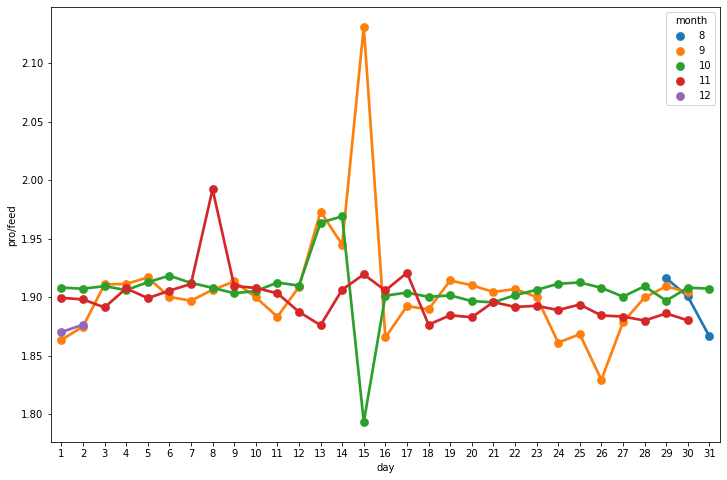

In [892]:
pro_feed=pd.DataFrame(df.groupby(['month','day'])['Formaldehyde product flow in kg/h'].sum()
                      /df.groupby(['month','day'])['Evaporator MeOH feed flow in kg/h'].sum()).reset_index()

pro_feed.rename(columns={0:'pro/feed'},inplace=True)
plt.figure(figsize=(12,8))
sns.pointplot(x='day', y='pro/feed',hue='month', data=pro_feed)
pro_feed

<AxesSubplot:xlabel='day', ylabel='Average reactor temperature'>

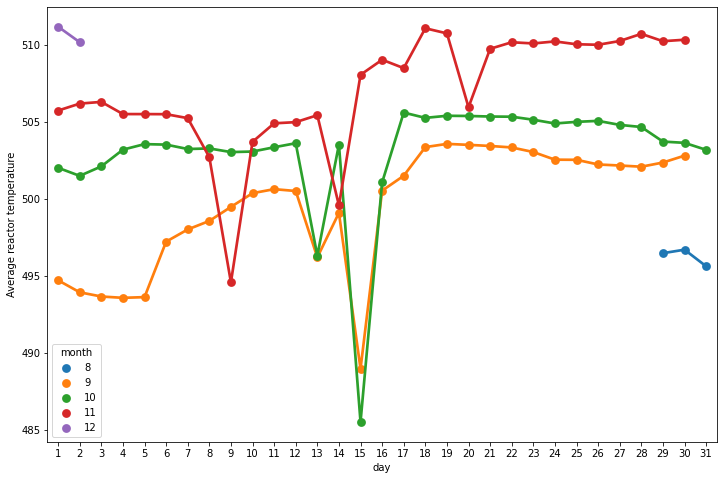

In [893]:
df_temp=pd.DataFrame(df.groupby(['month','day'])[ 'Average reactor temperature'].mean()).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x='day', y= 'Average reactor temperature',hue='month', data=df_temp)

In [894]:
'''
data['month']=df['month']
data['day']=df['day']
df_temp1=pd.DataFrame(data.groupby(['month','day'])['Reactor temperature at position 1 in °C'].mean()).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x='day', y='Reactor temperature at position 1 in °C',hue='month', data=df_temp1)
'''

"\ndata['month']=df['month']\ndata['day']=df['day']\ndf_temp1=pd.DataFrame(data.groupby(['month','day'])['Reactor temperature at position 1 in °C'].mean()).reset_index()\nplt.figure(figsize=(12,8))\nsns.pointplot(x='day', y='Reactor temperature at position 1 in °C',hue='month', data=df_temp1)\n"

,month,day,pro/temp
0,8,29,22.558420
1,8,30,89.431317
2,8,31,84.105621
3,9,1,80.375612
4,9,2,78.475119
...,...,...,...
91,11,28,146.856218
92,11,29,147.463132
93,11,30,146.971670
94,12,1,145.956855


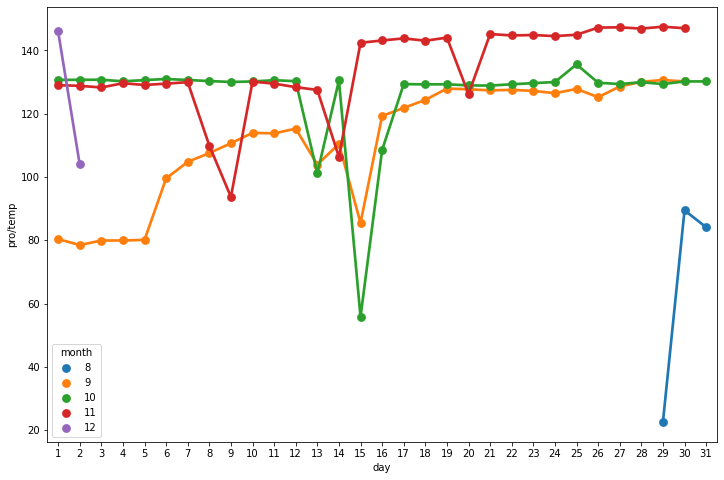

In [895]:
pro_temp=pd.DataFrame(df.groupby(['month','day'])['Formaldehyde product flow in kg/h'].sum()
                      /df.groupby(['month','day'])['Average reactor temperature'].mean()).reset_index()

pro_temp.rename(columns={0:'pro/temp'},inplace=True)
plt.figure(figsize=(12,8))
sns.pointplot(x='day', y='pro/temp',hue='month', data=pro_temp)
pro_temp

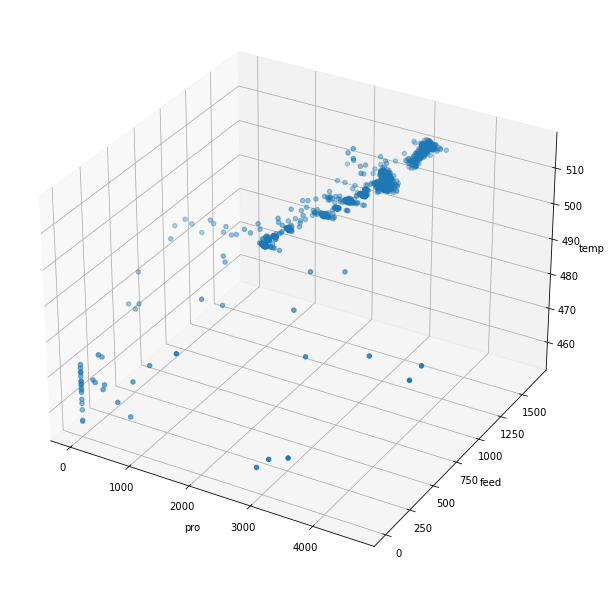

In [896]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure(figsize=(8, 8)))
ax.scatter(xs=df['Formaldehyde product flow in kg/h'], ys=df['Evaporator MeOH feed flow in kg/h'],
           zs=df['Average reactor temperature'], s=20)
ax.set_xlabel("pro")
ax.set_ylabel("feed")
ax.set_zlabel("temp")
plt.show()


In [897]:
#handling outlier
for name in df_new.columns:
    mean  = df_new[name].mean()
    std = df_new[name].std()
    
    LCL =mean-2*std
    UCL =mean+2*std
    df_new[(df_new[name]>UCL)][name]=UCL
    df_new[(df_new[name]<LCL)][name]=LCL   


<ipython-input-897-df7160631fa7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[(df_new[name]>UCL)][name]=UCL
<ipython-input-897-df7160631fa7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[(df_new[name]<LCL)][name]=LCL
<ipython-input-897-df7160631fa7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

C:\Users\Marzieh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marzieh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marzieh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

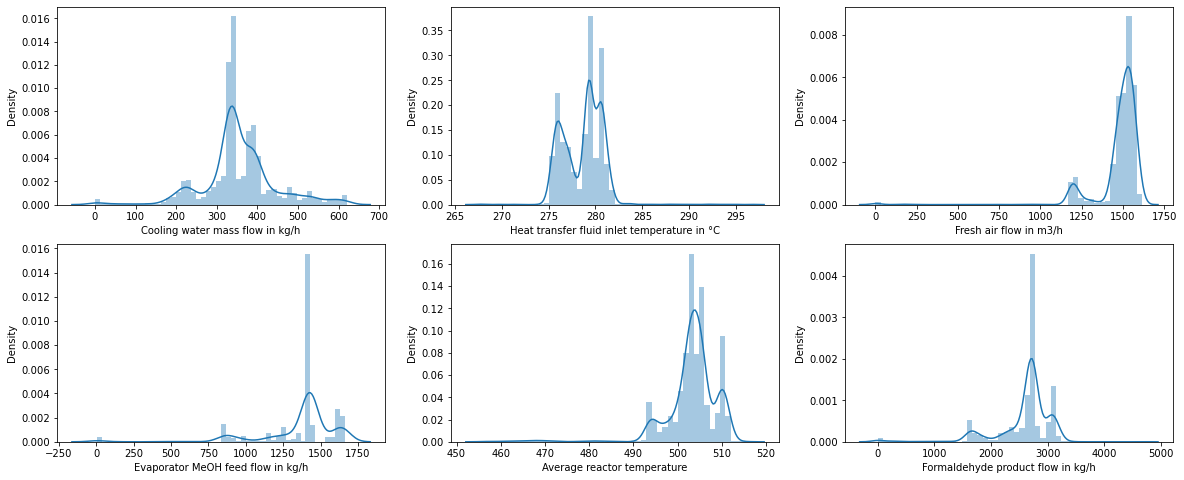

In [898]:

fig, axes=plt.subplots(2,3,figsize=(20,8))
for name, ax in zip(df_new.columns, axes.flatten()):
    sns.distplot(df[name],ax=ax)


In [899]:
#stationary test and removing trend and seasonality
from statsmodels.tsa.stattools import adfuller
adfuller(df_new['Heat transfer fluid inlet temperature in °C'])

(-2.2485571964345437,
 0.18909607573942572,
 25,
 2254,
 {'1%': -3.43325450880204,
  '5%': -2.862823135013053,
  '10%': -2.567453072861103},
 2433.266549513986)

<ipython-input-900-e0bb7d496b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Heat transfer fluid inlet temperature in °C_diff1'] = df_new['Heat transfer fluid inlet temperature in °C'].diff()


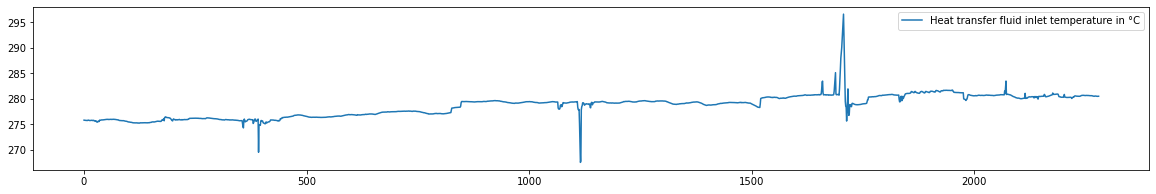

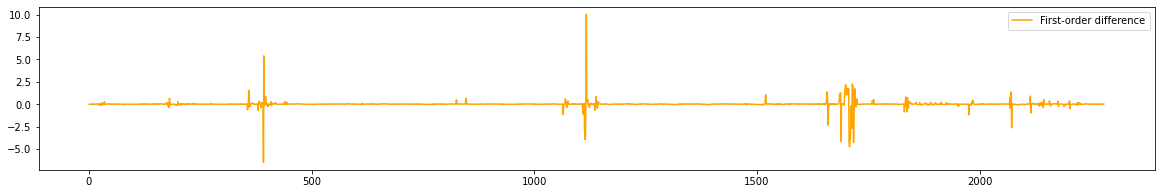

In [900]:
df_new['Heat transfer fluid inlet temperature in °C_diff1'] = df_new['Heat transfer fluid inlet temperature in °C'].diff()

plt.figure(figsize=(20,3))
plt.plot(df_new['Heat transfer fluid inlet temperature in °C'], label='Heat transfer fluid inlet temperature in °C')
plt.legend()
plt.figure(figsize=(20,3))
plt.plot(df_new['Heat transfer fluid inlet temperature in °C_diff1'], label='First-order difference', color='orange')

plt.legend()


In [901]:
df_new['Evaporator MeOH feed flow in kg/h_diff1'] = df_new['Evaporator MeOH feed flow in kg/h'].diff()
df_new['Cooling water mass flow in kg/h_diff1'] = df_new['Cooling water mass flow in kg/h'].diff()
df_new = df_new.dropna()
adf_diff_1 = adfuller(df_new['Heat transfer fluid inlet temperature in °C_diff1'])
#adf_diff_2 = adfuller(df['Heat transfer fluid inlet temperature in °C_diff2'])
adf_diff_1

<ipython-input-901-d17808bc6b3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Evaporator MeOH feed flow in kg/h_diff1'] = df_new['Evaporator MeOH feed flow in kg/h'].diff()
<ipython-input-901-d17808bc6b3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cooling water mass flow in kg/h_diff1'] = df_new['Cooling water mass flow in kg/h'].diff()


(-12.675519562453996,
 1.218255642796106e-23,
 27,
 2251,
 {'1%': -3.433258384187781,
  '5%': -2.862824846221197,
  '10%': -2.567453983958164},
 2433.750041893527)

In [902]:
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
columns=['Evaporator MeOH feed flow in kg/h_diff1',
       'Heat transfer fluid inlet temperature in °C_diff1',
         'Cooling water mass flow in kg/h_diff1',
         'Fresh air flow in m3/h']
df_for_model=df_new[columns]
X=df_for_model
y=(df_new['Average reactor temperature'])
X_train, X_test = X.iloc[:1500,:], X.iloc[1500:,:]
y_train,y_test=y[:1500],y[1500:]


In [903]:

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))


In [904]:
TIME_STEPS=1

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)])
        ys.append(y.iloc[i+time_steps:i+time_steps+1].values)
    
    return np.array(Xs), np.array(ys)

X_train, y_train= create_sequences(X_train,y_train,TIME_STEPS)
X_test, y_test = create_sequences(X_test,y_test,TIME_STEPS)

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')
y_train.shape

Training shape: (1499, 1, 4)
Testing shape: (778, 1, 4)


(1499, 1)

In [909]:
model = Sequential()
model.add(LSTM(64, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(16, activation='relu',return_sequences=False))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))

model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(16, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='RMSProp',loss='mean_squared_error')
history=model.fit(X_train,y_train,epochs=20, batch_size=32,verbose=0, validation_split=0.1).history

In [910]:
predict=model.predict(X_test)
predict

array([[491.21948],
       [491.99524],
       [491.61838],
       [492.06836],
       [493.38788],
       [489.96173],
       [491.1791 ],
       [492.93707],
       [490.56976],
       [491.63632],
       [491.88492],
       [491.5517 ],
       [490.85165],
       [491.62933],
       [492.97134],
       [491.463  ],
       [492.68777],
       [492.60577],
       [502.99054],
       [505.22906],
       [493.76126],
       [493.0172 ],
       [493.3324 ],
       [492.2086 ],
       [493.36053],
       [492.94464],
       [492.4965 ],
       [492.8669 ],
       [493.30038],
       [492.0231 ],
       [493.00995],
       [493.4207 ],
       [492.3414 ],
       [492.74966],
       [492.9812 ],
       [493.1041 ],
       [492.88925],
       [491.6727 ],
       [493.11078],
       [492.79956],
       [492.33218],
       [492.7234 ],
       [491.50995],
       [492.9964 ],
       [491.81628],
       [492.6781 ],
       [490.57507],
       [494.54456],
       [492.34344],
       [492.9771 ],


In [911]:
sqrt(mean_squared_error(predict,y_test))

16.008092184250305

In [13]:
'''
from math import sqrt
fig,ax=plt.subplots(figsize=(12,6))
ax.plot([sqrt(i) for i in history['loss']],'b', label='train')
ax.plot([sqrt(i) for i in history['val_loss']],'r', label='validation')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('RMSE')
'''

"\nfrom math import sqrt\nfig,ax=plt.subplots(figsize=(12,6))\nax.plot([sqrt(i) for i in history['loss']],'b', label='train')\nax.plot([sqrt(i) for i in history['val_loss']],'r', label='validation')\nax.legend()\nax.set_xlabel('Epochs')\nax.set_ylabel('RMSE')\n"